In [1]:
from connec_functions import execute_to_df, generate_sparql

import pandas as pd
import matplotlib.pyplot as plt

In [148]:
file_path = 'data/datasetsPublicVlizcore_20240305.csv'
df = pd.read_csv(file_path, delimiter = ";")
df

,dasid,StandardTitle,Citation,AccessConstraint,AccConNotes
0,1,MWTL physical monitoring network: current wate...,NaN,Attribution (CC BY),Release with permission of the appropriate par...
1,2,Algaebase,"Guiry, M.D. & Guiry, G.M. 2012. AlgaeBase. Wor...","For more information on the restrictions, use ...",NaN
2,3,VLIZ's Marine Species Register,VLIZ (2004). Data from VLIZ's Marine Species R...,Attribution (CC BY),NaN
3,4,Arctic Benthic Fauna,NaN,NaN,NaN
4,5,Arctic hard-bottom fauna [Jan Mayen I.],NaN,NaN,NaN
...,...,...,...,...,...
5567,8544,Acoustic telemetry study of Allis shad (<i>Alo...,"Kroes, R.; Verhelst, P.; Van Rijssel, J.C.; Me...",Attribution (CC BY),NaN
5568,8551,Blue crab (<i>Callinectes sapidus</i>) telemet...,BIOTOPE (2024) : Csapidus_monitoring_Occitanie...,Attribution (CC BY),NaN
5569,8552,Acoustic telemetry study of European eel (<i>A...,"Winter, HV; Griffioen, AB; van Keeken, OA; van...",Attribution (CC BY),NaN
5570,8553,Acoustic telemetry study in the Meuse river ba...,"van Rijssel, JC.; Claus, MPA; van Emmerik, WAM...",Attribution (CC BY),NaN


In [149]:
# Dataframe of missing data
total_values = df.count()
missing_values = df.isnull().sum()

summary_df = pd.concat([total_values, missing_values], axis=1)
summary_df.columns = ['Present Values', 'Missing Values']
#summary_df['Total Values'] = summary_df['Present Values'] + summary_df['Missing Values'] 
#summary_df = summary_df.transpose()

summary_df

,Present Values,Missing Values
dasid,5572,0
StandardTitle,5571,1
Citation,4122,1450
AccessConstraint,5116,456
AccConNotes,828,4744


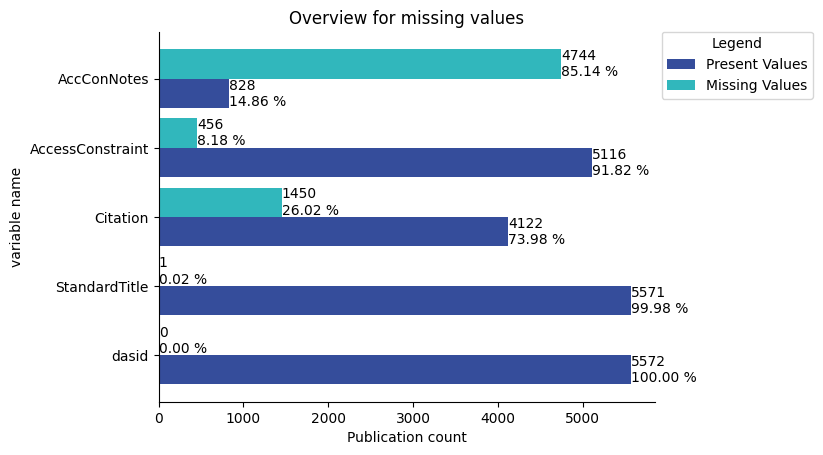

In [150]:
#test if barh is better
ax = summary_df.plot(kind='barh', ylabel='variable name', title='Overview for missing values', width=0.85, color=['#354d9b', '#31b7bc'])
ax.set(xlabel='Publication count')

total = summary_df.sum(axis=1).iloc[0]
for c, col in zip(ax.containers, summary_df.columns):
    ax.bar_label(c, label_type='edge', labels=[f'{val}\n{val / total * 100.0:.2f} %' for val in summary_df[col]])

ax.legend(title='Legend', bbox_to_anchor=(1, 1.02), loc='upper left')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#plt.tight_layout()
plt.show()

In [151]:
# Distribution of Access Constraints
grouped = df.groupby('AccessConstraint', dropna=True).nunique()

grouped_sub = grouped[['dasid']] #.reset_index()
grouped_sub = grouped_sub.rename(columns={'dasid':'publication'})

grouped_sub_sorted = grouped_sub.sort_values(by='publication')
grouped_sub_sorted

,publication
AccessConstraint,
Public Domain Mark (No Known Copyright),1
Attribution-NoDerivatives (CC BY-ND),5
Commercially available,15
Licence,17
Attribution-NonCommercial-NoDerivatives (CC BY-NC-ND),19
Unrestricted for academic use,20
Attribution-ShareAlike (CC BY-SA),23
"The data can be made available upon approval of the data provider, please contact data@vliz.be.",25
Attribution-NonCommercial-ShareAlike (CC BY-NC-SA),37


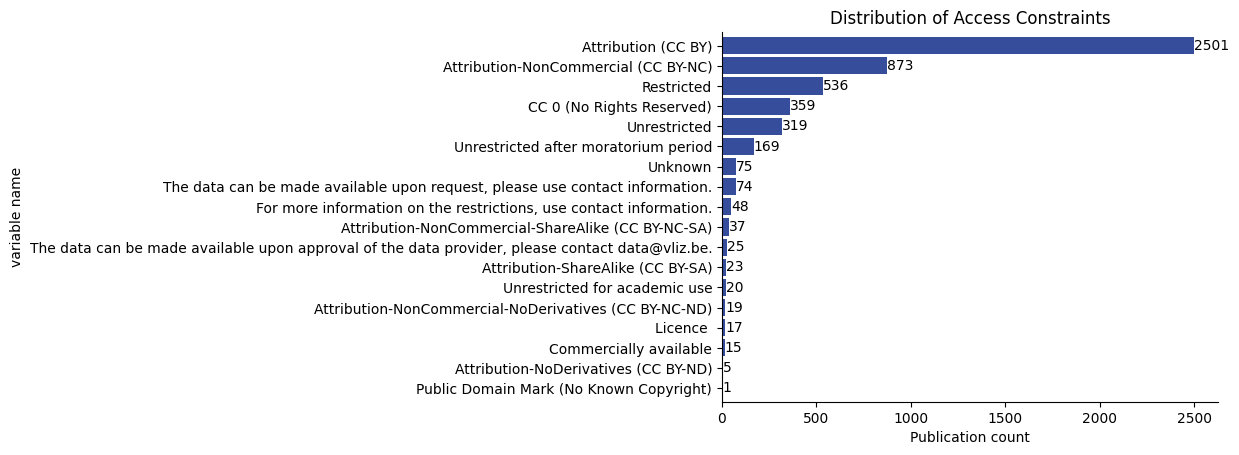

In [152]:
# Barplot of Distribution of Access Constraints
ax = grouped_sub_sorted.plot(kind='barh', ylabel='variable name', title='Distribution of Access Constraints', width=0.85, color=['#354d9b'], legend=False)
ax.set(xlabel='Publication count')

total = grouped_sub_sorted.sum(axis=1).iloc[0]
for c, ind in zip(ax.containers, grouped_sub_sorted.index):
    ax.bar_label(c, label_type='edge', labels=[f'{val}' for val in grouped_sub_sorted.loc[ind]])

#ax.legend(title='Legend', loc='lower right')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#plt.tight_layout()
plt.show()